# Интервальные оценки

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
n = 1000
X1 = np.random.normal(0, 0.95, n)
X2 = np.random.normal(1, 1.05, n)

def get_inn(X):
    Q1 = np.percentile(X, 25)
    Q3 = np.percentile(X, 75)
    return (Q1, Q3)

def get_out(X):
    return (np.min(X), np.max(X))

def jaccard(interval1, interval2):
    left = max(interval1[0], interval2[0])
    right = min(interval1[1], interval2[1])
    intersection = max(0, right - left)
    union = max(interval1[1], interval2[1]) - min(interval1[0], interval2[0])
    return intersection / union if union != 0 else 0

# Варьирование параметра сдвига а

In [6]:
a_values = np.linspace(-2, 4, 600)
J_inn = []
J_out = []

for a in a_values:
    shifted_X1 = X1 + a
    inn1 = get_inn(shifted_X1)
    out1 = get_out(shifted_X1)
    inn2 = get_inn(X2)
    out2 = get_out(X2)
    J_inn.append(jaccard(inn1, inn2))
    J_out.append(jaccard(out1, out2))

a_inn = a_values[np.argmax(J_inn)]
a_out = a_values[np.argmax(J_out)]
a_inn2 = a_values[np.where(J_inn == np.max(J_inn))[0][-1]]
a_out2 = a_values[np.where(J_out == np.max(J_out))[0][-1]]

print(f"a_inn: {a_inn:.3f}", end=' ')
print(f"{a_inn2:.3f}")
print(f"a_out: {a_out:.3f}", end=' ')
print(f"{a_out2:.3f}")


a_inn: 0.985 1.145
a_out: 0.705 0.985


# График индекса Жаккара

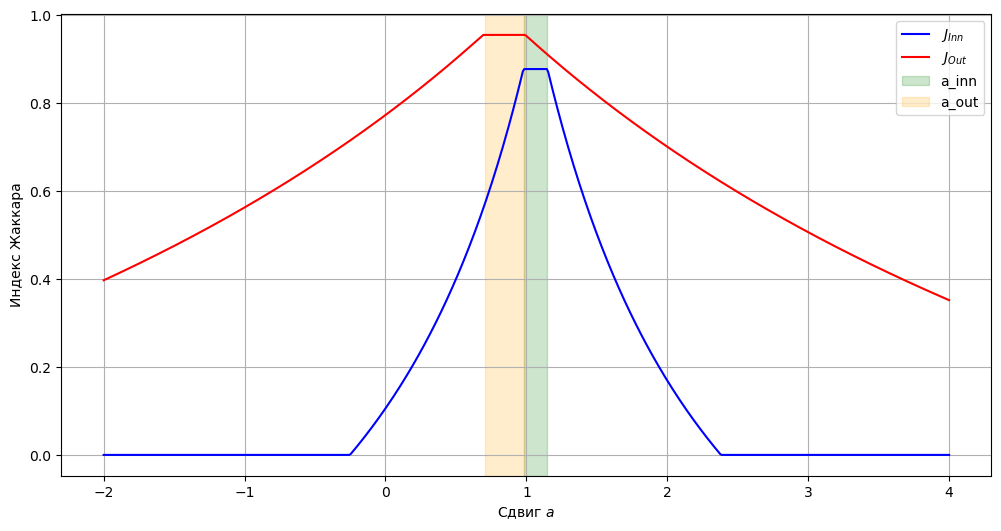

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(a_values, J_inn, label='$J_{Inn}$', color='blue')
plt.plot(a_values, J_out, label='$J_{Out}$', color='red')

# Первый интервал закраски
plt.axvspan(a_inn, a_inn2, color='green', alpha=0.2, label='a_inn')
# Второй интервал закраски
plt.axvspan(a_out, a_out2, color='orange', alpha=0.2, label='a_out')
# Пересечение интервалов
left = max(a_inn, a_out)
right = min(a_inn, a_out2)
if left < right:
    plt.axvspan(left, right, color='purple', alpha=0.4, label='Пересечение')
plt.xlabel('Сдвиг $a$')
plt.ylabel('Индекс Жаккара')

plt.legend()
plt.grid(True)
plt.show()